In [17]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 5.2 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 13.8 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 14.7 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 12.3 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.7/1.7 MB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 17.0 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 177.8/177.8 kB 11.2 MB/s eta 0:00:00
  Using cached tensorboard_

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [40]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [42]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [44]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [45]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [46]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
X_train.shape

(8000, 11)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(units=10,activation='linear',input_dim=11))

model.add(Dense(units=1,activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_train_trf,y_train,epochs=5,verbose=1)
#history = model.fit(X_train_trf,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(X_test_trf,y_test))

Epoch 1/5
250/250 [==============================] - 1s 1ms/step - loss: 0.5754 - accuracy: 0.7174
Epoch 2/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8050
Epoch 3/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8059
Epoch 4/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8091
Epoch 5/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8091


In [36]:
y_pred = model.predict(X_test_trf)

63/63 [==============================] - 0s 1ms/step


In [37]:
y_pred

array([[0.22448938],
       [0.32760388],
       [0.16241623],
       ...,
       [0.21863884],
       [0.13865195],
       [0.24744916]], dtype=float32)

In [38]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 11941.6914 - accuracy: 0.2035


[11941.69140625, 0.20350000262260437]

KeyError: 'val_loss'

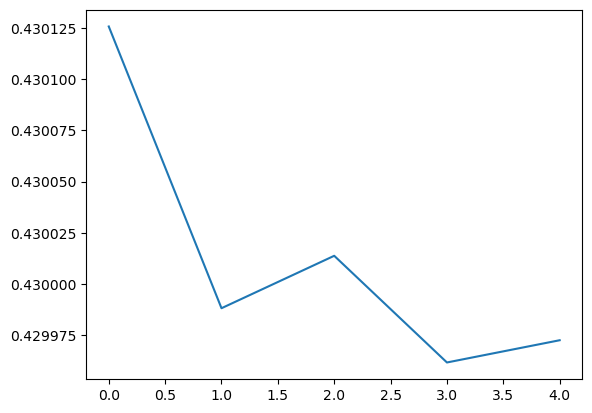

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

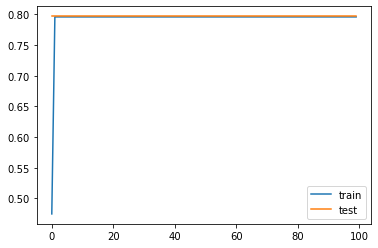

In [53]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()